In [42]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation

# Ecuación de advección

Revisaremos la solución numérica de la ecuación de advección

$$
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
$$

donde $c>0$ es la velocidad de advección.

Una solución analítica de este ecuación tiene la forma $u(x,t)=u(x-ct)$, la cual representa una onda que se mueve sin deformarse hacia la derecha con velocidad $c$.

En este caso, estudiaremos la evolución de una función dada por

$$
u_0(x.t) = \left\{\begin{array}{cc}
                    2 & 0.5 < x < 1 \\
                    0 & \mathrm{resto}
                  \end{array}\right.
$$

# Método de diferencias finitas

La ecuación de advección puede ser resuelta usando una aproximación de diferencias finitas sobre una grilla dada por $x_{i+1}=x_i+\Delta x$ ($i=0,1,\ldots,N-1$ y $t_n=n\Delta t$ ($n=0,1,\ldots$), donde $x_0=0$ y $t_0=0$. 

Usaremos aproximaciones de dos puntos a las derivas de $u$ (método FTBS), así se obtiene la siguiente ecuación 

$$
\frac{u_i^{n+1} - u_i^n}{\Delta t} = -c\frac{u_i^{n} - u_{i-1}^n}{\Delta x}
$$

donde $u_i^n\equiv(x_i,t_n)$. O bien

$$
u_i^{n+1} = u_i^n - \frac{c\Delta t}{\Delta x} [u_i^{n} - u_{i-1}^n]
$$

In [43]:
nx = 81
dx = 2/(nx-1)
nt = 25
dt = 0.025
c = 1
print ('Número de Courant = %6.4f (debe ser menor o igual a 1)' % float(c*dt/dx))

Número de Courant = 1.0000 (debe ser menor o igual a 1)


Definamos la condición inicial

In [44]:
u = np.zeros(nx)
u[int(.5 / dx):int(1 / dx + 1)] = 2
print(u)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Text(0.5, 1.0, 'Condición inicial')

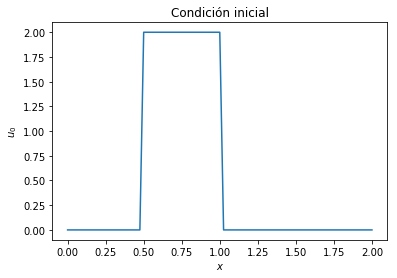

In [45]:
plt.plot(np.linspace(0, 2, nx), u);
plt.xlabel(r'$x$')
plt.ylabel(r'$u_0$')
plt.title('Condición inicial')

Integremos la ecuación de advección para esta condición inicial

In [46]:
un = np.zeros(nx)
v = np.zeros(shape=(nt,nx))

for n in range(nt):
    un = u.copy()
    v[n] = un
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    v[n] = u

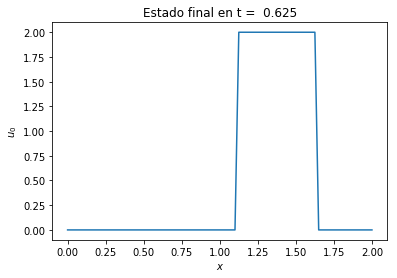

In [47]:
time = nt*dt
plt.plot(np.linspace(0, 2, nx), u)
plt.xlabel(r'$x$')
plt.ylabel(r'$u_0$')
plt.title('Estado final en t = %6.3f' % time);

Inicialización de la animación

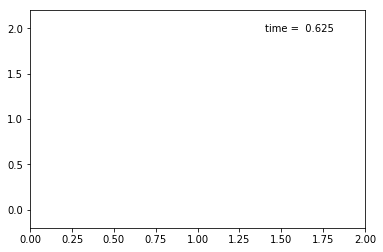

In [48]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-0.2, 2.2))
time_text = ax.text(0.7, 0.9, 'time = %6.3f' % time, transform=ax.transAxes)

line, = ax.plot([], [], lw=2)

In [49]:
def init():
    line.set_data([], [])
    time_text.set_position((0.7,0.9))
    time_text.set_text('time = %6.3f' % 0)
    return (line,time_text)

In [50]:
def animate(i):
    x = np.linspace(0, 2, nx)
    y = v[i]
    line.set_data(x, y)
    time_text.set_position((0.7,0.9))
    time = i*dt
    time_text.set_text('time = %6.3f' % time)
    return (line,time_text)

In [51]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nt, interval=80, 
                               blit=True)

In [52]:
#HTML(anim.to_html5_video())
HTML(anim.to_jshtml())

Ahora, optimicemos el código e incluyamos condiciones de borde periódicas.

In [53]:
def condicion_inicial(nx,dx):
    u0 = np.zeros(nx)
    u0[int(.5/dx):int(1/dx + 1)] = 1
    return (u0)

def FTBS(u0,u,r,periodic=True):
    # Condiciones de borde períodicas
    if (periodic):
        u[1:-1] = u0[1:-1] - r*(u0[1:-1] - u0[0:-2])
        u[0] = u0[0] - r*(u0[0] - u0[-2])
        u[-1] = u[0]
    # Condiciones de borde libre (outflow)
    else:
        u[1:] = u0[1:] - r*(u0[1:] - u0[0:-1])
        u[0] = 0

Resolvamos la ecuación de advección para la condición inicial de un escalón finito

In [54]:
nx = 100
dx = 2/(nx-1)
nt = 250
#dt = 0.025
c = 0.5
dt = dx/c
r = c*dt/dx
print ('Número de Courant = %6.4f (debe ser menor o igual a 1)' % r)

Número de Courant = 1.0000 (debe ser menor o igual a 1)


In [55]:
u0 = condicion_inicial(nx,dx)
v = np.zeros(shape=(nt,nx))
u = np.zeros(nx)

v[0] = u0
for n in range(1,nt):
    FTBS(u0, u, r)
    u0 = u
    v[n] = u

In [56]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nt, interval=80, 
                               blit=True)

In [57]:
HTML(anim.to_jshtml())

Ahora definamos la condición inicial como una función Gaussiana centrada en $x=0.5$.

In [58]:
def condicion_inicial2(x):
    return (2*np.exp(-50.0*(x-0.5)**2))

In [59]:
nx = 81
dx = 2/(nx-1)
nt = 50
dt = 0.025
c = 0.5
r = c*dt/dx
print ('Número de Courant = %6.4f (debe ser menor o igual a 1)' % r)

Número de Courant = 0.5000 (debe ser menor o igual a 1)


In [60]:
x = np.linspace(0,2,nx)
u0 = condicion_inicial2(x)
v = np.zeros(shape=(nt,nx))
u = np.zeros(nx)

v[0] = u0
for n in range(1,nt):
    FTBS(u0, u, r, periodic=False)
    u0 = u
    v[n] = u

In [61]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nt, interval=80, 
                               blit=True)

In [62]:
HTML(anim.to_jshtml())

Comparemos la solución exacta con la solución numérica.

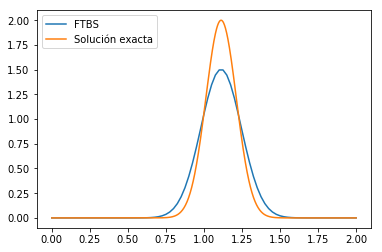

In [63]:
x = np.linspace(0,2,nx)
plt.plot(x, u0,label = 'FTBS')
tend = (nt-1)*dt
xs = np.linspace(0,2,1000)
plt.plot(xs,condicion_inicial2(xs-c*tend), label='Solución exacta')
plt.legend(loc=2)

# Método ímplicito en el tiempo

Consideremos la discretización

$$
\frac{u_i^{n+1} - u_i^n}{\Delta t} = -c\frac{u_i^{n+1} - u_{i-1}^{n+1}}{\Delta x}
$$

Esta ecuación se puede reescribir como un sistema de ecuaciones algebraicas con incógnitas $u_i^{n+1}$ 

$$
-ru_{i-1}^{n+1} + (1+r)u_i^{n+1} = u_j^n \;\;\;\;\;\; j=1,\ldots,N-1
$$

donde $r=c\Delta t/\Delta x$. Supongamos condiciones de borde periódicas $u_{0}^{n+1}=u_{N-1}^{n+1}$, entonces

$$
\begin{pmatrix}
1+r & 0 & \cdots  & \cdots & \cdots  & -r \\
-r & 1+r & 0 & \cdots & \cdots  & 0 \\
0 & -r & 1+r & 0 & \cdots & 0 \\
\cdots & 0 & \ddots & \ddots & 0  & 0\\
\dots & \cdots & 0 & -r & 1+r & 0 \\
0 & 0 & \cdots & 0 & -r & 1+r 
\end{pmatrix} 
\begin{pmatrix}
u_{1}^{n+1} \\
u_{2}^{n+1} \\
u_{3}^{n+1} \\
\vdots \\
\vdots \\
u_{N-1}^{n+1}
\end{pmatrix} = \begin{pmatrix}
u_{1}^{n} \\
u_{2}^{n} \\
u_{3}^{n} \\
\vdots \\
\vdots \\
u_{N-1}^{n}
\end{pmatrix}
$$


In [64]:
nx = 81
dx = 2/(nx-1)
nt = 40
dt = 0.025
c = 1
r = c*dt/dx
print ('Número de Courant = %6.4f (debe ser menor o igual a 1)' % r)

Número de Courant = 1.0000 (debe ser menor o igual a 1)


Definamos la matriz A

In [65]:
A = np.zeros(shape=(nx-1,nx-1))
np.fill_diagonal(A,1+r)

for i in range(0,nx-1):
    for j in range(0,nx-1):
        if ( i == j+1 ):
            A[i,j] = -r

A[0,-1] = -r
            
print (A)

[[ 2.  0.  0. ...  0.  0. -1.]
 [-1.  2.  0. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2.  0.  0.]
 [ 0.  0.  0. ... -1.  2.  0.]
 [ 0.  0.  0. ...  0. -1.  2.]]


In [66]:
x = np.linspace(0,2,nx)
u0 = condicion_inicial2(x)
v = np.zeros(shape=(nt,nx))
u1 = np.zeros(nx-1)

v[0] = u0
for n in range(1,nt):
    u1 = u0[1:]
    u1 = np.linalg.solve(A,u1)
    u0[0]  = u1[-1]
    u0[1:] = u1
    v[n] = u0

In [67]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nt, interval=80, 
                               blit=True)

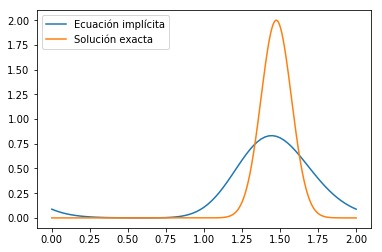

In [68]:
x = np.linspace(0,2,nx)
plt.plot(x, u0,label = 'Ecuación implícita')
tend = (nt-1)*dt
xs = np.linspace(0,2,1000)
plt.plot(xs,condicion_inicial2(xs-c*tend), label='Solución exacta')
plt.legend(loc=2)

In [69]:
HTML(anim.to_jshtml())